In [158]:
import keras
from keras.layers import Dense,BatchNormalization,Lambda
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
li=list(range(500))
X=np.array(li,dtype=np.float32)
Y=2*X+1
def norm_i(inp):
    return (inp-X.mean())/X.std()

[array([[ 1.35672903]], dtype=float32), array([ 0.], dtype=float32)]


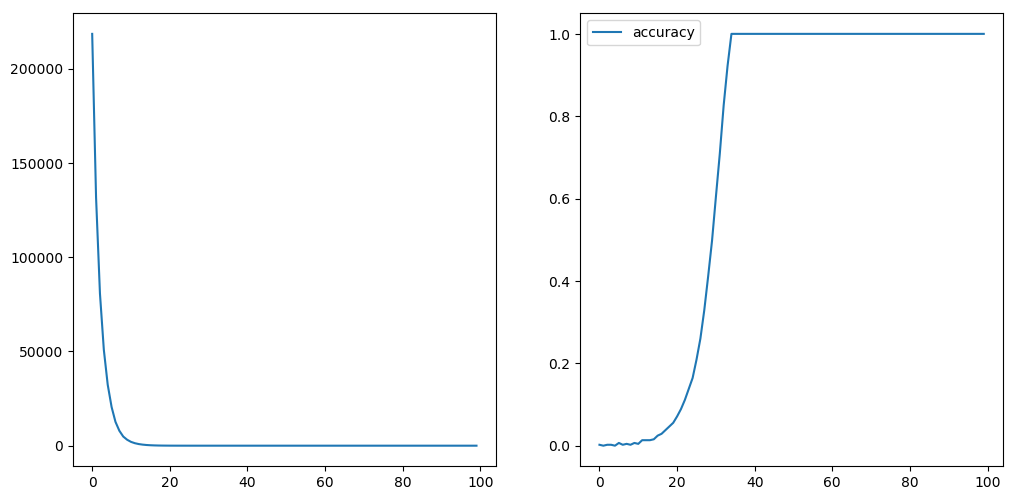

In [296]:
model=Sequential([
   Lambda(norm_i,input_shape=(1,)),
    #Dense(1),
    Dense(1,activation='linear')

    
])
model.compile(optimizer='SGD',loss='mse',metrics=['accuracy'])
model.optimizer.lr=1e-2
print(model.layers[1].get_weights())
#model.layers[0].set_weights([np.array([[ 1]], dtype=np.float32), np.array([ 1.], dtype=np.float32)])
history=model.fit(X,Y,verbose=0,nb_epoch=100,validation_split=0.1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.epoch,history.history['loss'],label='Loss')
plt.subplot(1,2,2)
plt.plot(history.epoch,history.history['acc'],label='accuracy')
plt.legend()

In [264]:
model.predict(np.array([1]))

array([[ 2.91992092]], dtype=float32)

In [195]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_134 (Dense)                (None, 1)             2           dense_input_54[0][0]             
Total params: 2
____________________________________________________________________________________________________
